DESCRIPTION

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

Steps to be done: 

⦁    Load the dataset that is given to you

⦁    Check for null values in the dataset

⦁    Print percentage of default to payer of the dataset for the TARGET column

⦁    Balance the dataset if the data is imbalanced

⦁    Plot the balanced data or imbalanced data

⦁    Encode the columns that is required for the model

⦁    Calculate Sensitivity as a metrice

⦁    Calculate area under receiver operating characteristics curve

In [75]:
import numpy as np
import pandas as pd

# Import visuals
import seaborn as sns
import matplotlib.pyplot as plt

# Import statsmodels
from sklearn.preprocessing import OneHotEncoder 
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score,f1_score
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import train_test_split
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import pickle
import gc

# Import scipy
from scipy.stats import boxcox
from scipy import stats

# Import Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
# Retrieve dataset
Loan_default = pd.read_csv('loan_data.csv')


In [4]:
rows, columns = Loan_default.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 307511
Columns: 122


In [5]:
Loan_default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
Loan_default.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Data Cleaning

It's time to create the dataframe that contains columns that will be used for further exploration and modeling. These columns have been selected to represent the personal financial data that is collected before and during the borrowing process. The features included here can be used to predict given the current status of a loan, could default on their loan or not.



In [7]:
Loan_default.isnull().sum()


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
Loan_default.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Analyzing Numerical Columns


In [9]:
Loan_default.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


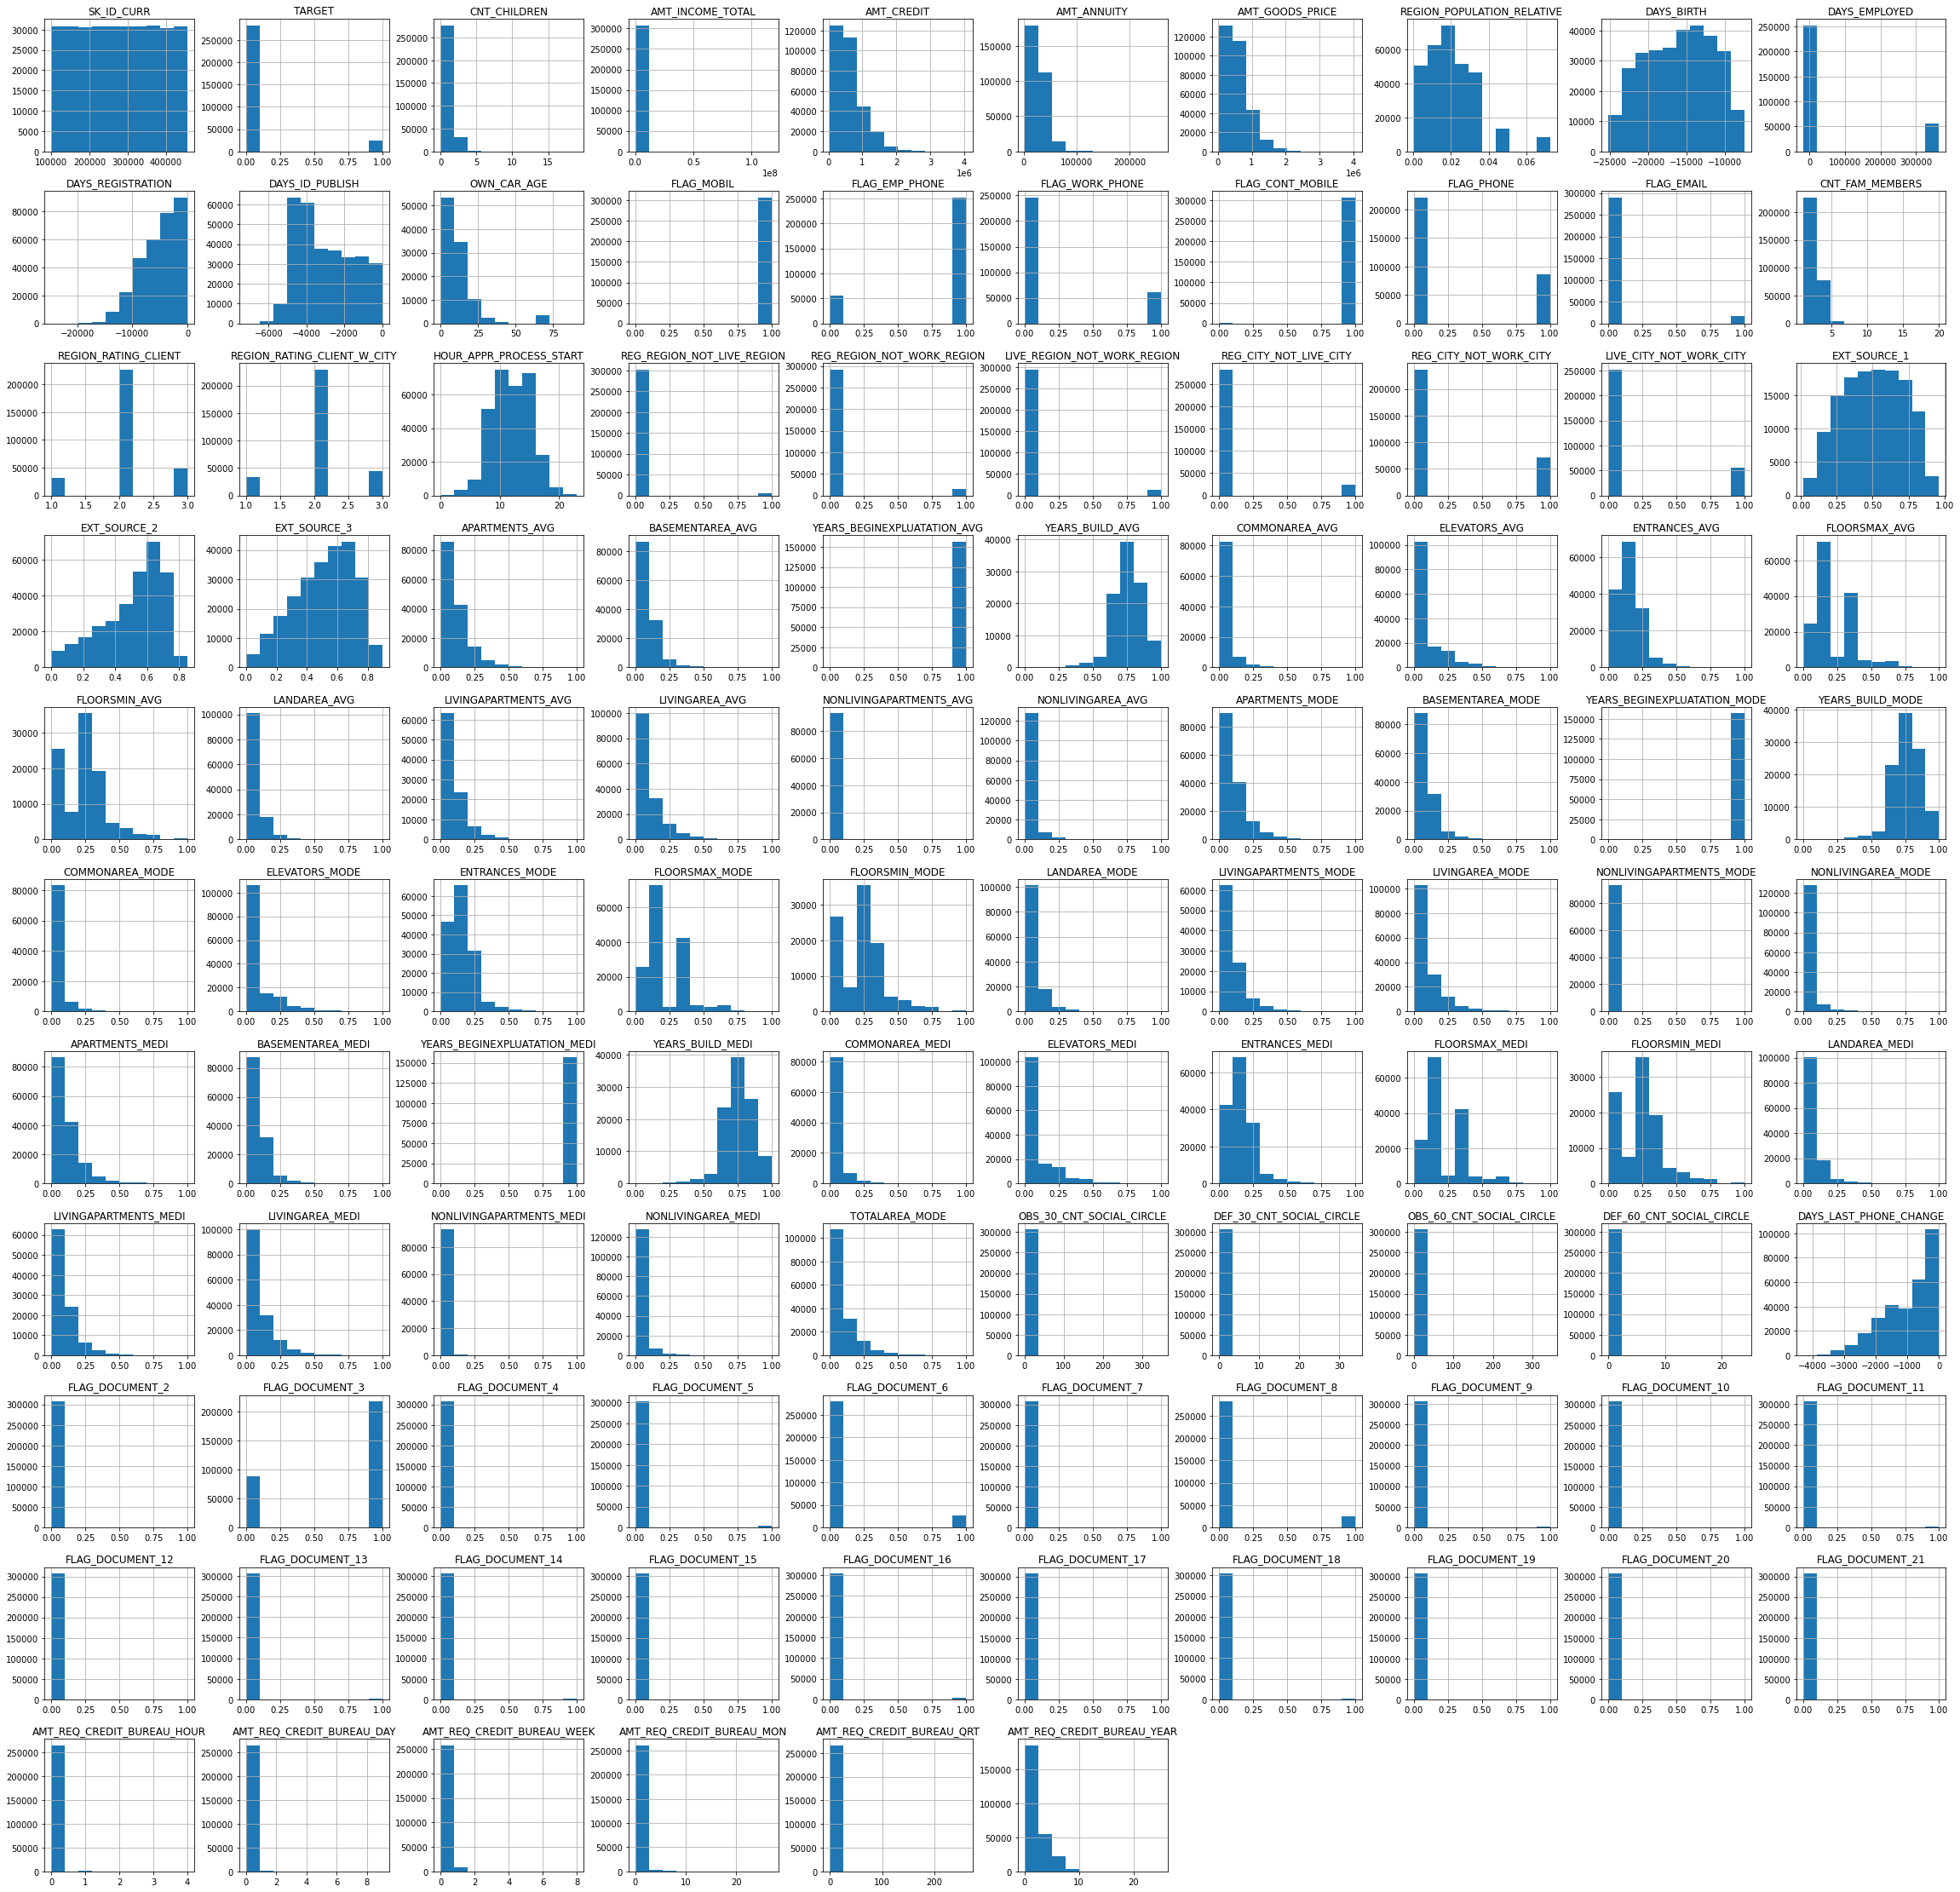

In [18]:
Loan_default.hist( figsize = (40, 40) )
plt.show()


In [19]:
defaulters=(Loan_default.TARGET==1).sum()
payers=(Loan_default.TARGET==0).sum()
print((defaulters/payers)*100)

8.781828601345662


In [20]:
without_id=[column for column in Loan_default.columns if column!='SK_ID_CURR'] 

#check for duplicate values
na=Loan_default[Loan_default.duplicated(subset=without_id,keep=False)] 
print("Duplicates are: ",na.shape[0])

Duplicates are:  0


<AxesSubplot:ylabel='TARGET'>

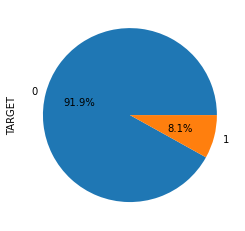

In [21]:
Loan_default.TARGET.value_counts().plot(kind='pie',autopct='%1.1f%%')


<AxesSubplot:ylabel='TARGET'>

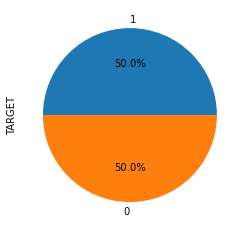

In [22]:
shuffled_data=Loan_default.sample(frac=1,random_state=3)
unpaid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==1] 
paid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==0].sample(n=24825,random_state=69)
normalised_home_loan=pd.concat([unpaid_home_loan,paid_home_loan])
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.1f%%")

In [23]:
import tensorflow as tf


In [24]:
normalised_home_loan.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 121862
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [25]:
normalised_home_loan.head


<bound method NDFrame.head of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
207339      340318       1         Cash loans           F            N   
8756        110186       1         Cash loans           M            Y   
230344      366811       1         Cash loans           F            N   
178329      306645       1         Cash loans           M            Y   
55586       164407       1         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
130947      251878       0         Cash loans           F            Y   
40467       146875       0         Cash loans           F            N   
187004      316791       0         Cash loans           M            N   
131755      252811       0         Cash loans           F            N   
121862      241287       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
207339     

In [26]:
normalised_home_loan.dropna(axis=0)
normalised_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 121862
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [27]:
normalised_home_loan.isnull().sum()


SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7648
AMT_REQ_CREDIT_BUREAU_WEEK    7648
AMT_REQ_CREDIT_BUREAU_MON     7648
AMT_REQ_CREDIT_BUREAU_QRT     7648
AMT_REQ_CREDIT_BUREAU_YEAR    7648
Length: 122, dtype: int64

In [28]:
#print(normalised_home_loan.apply())
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_DAY)) 
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_WEEK))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_MON))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_QRT))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_YEAR))

[ 0. nan  1.  2.  4.  3.  9.]
[ 0. nan  1.  2.  4.  3.  5.  6.]
[ 0. nan  1.  3.  5.  9.  2.  6.  8.  4. 11. 12.  7. 13. 10. 17. 15. 14.
 16. 18. 27.]
[ 0. nan  2.  3.  1.  4.  5.  6. 19.  7.]
[ 3.  0. nan  1.  5.  4.  2.  6.  7.  8.  9. 10. 14. 13. 12. 11. 22. 16.
 23. 17.]


In [29]:
normalised_home_loan.dropna(axis=0)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
279124,423360,1,Cash loans,M,Y,N,1,157500.0,1125000.0,33025.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
216116,350411,1,Cash loans,M,Y,N,0,112500.0,225000.0,25447.5,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,1.0
133687,255050,1,Cash loans,M,Y,N,1,337500.0,704844.0,26977.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
4159,104863,1,Cash loans,M,Y,N,0,265500.0,521280.0,28408.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
208602,341779,1,Cash loans,F,Y,Y,1,247500.0,544491.0,17694.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108677,226053,0,Cash loans,M,Y,Y,0,135000.0,679500.0,36333.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
258603,399273,0,Revolving loans,M,Y,Y,1,450000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
51880,160079,0,Cash loans,M,Y,Y,0,202500.0,750649.5,53514.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
282820,427561,0,Cash loans,F,Y,N,0,270000.0,1800000.0,62568.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0


In [30]:
print(normalised_home_loan.info())
print(normalised_home_loan.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 121862
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB
None
SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7648
AMT_REQ_CREDIT_BUREAU_WEEK    7648
AMT_REQ_CREDIT_BUREAU_MON     7648
AMT_REQ_CREDIT_BUREAU_QRT     7648
AMT_REQ_CREDIT_BUREAU_YEAR    7648
Length: 122, dtype: int64


<AxesSubplot:ylabel='TARGET'>

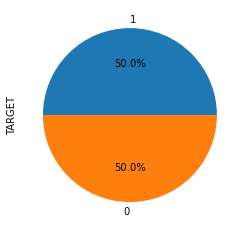

In [31]:
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.1f%%")


<AxesSubplot:ylabel='NAME_CONTRACT_TYPE'>

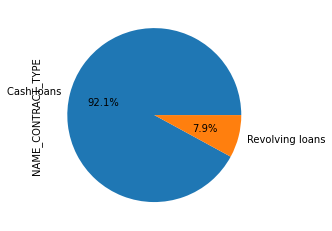

In [32]:
normalised_home_loan.NAME_CONTRACT_TYPE.value_counts().plot(kind='pie',autopct="%1.1f%%") 
#high amount of cash loans

<AxesSubplot:ylabel='CODE_GENDER'>

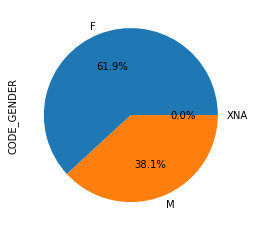

In [33]:
normalised_home_loan.CODE_GENDER.value_counts().plot(kind='pie',autopct="%1.1f%%") 
#roughly equal amount

<AxesSubplot:ylabel='FLAG_OWN_CAR'>

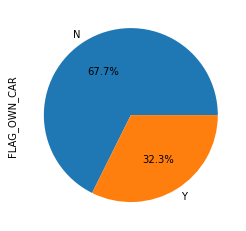

In [34]:
normalised_home_loan.FLAG_OWN_CAR.value_counts().plot(kind='pie',autopct="%1.1f%%")


<AxesSubplot:ylabel='CNT_CHILDREN'>

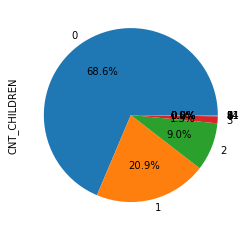

In [35]:
normalised_home_loan.CNT_CHILDREN.value_counts().plot(kind='pie',autopct="%1.1f%%")


In [36]:
pip install chart_studio

In [42]:
import cufflinks as cf
cf.go_offline()

In [43]:
cf.set_config_file(theme='polar')

normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] < 2000000]['AMT_INCOME_TOTAL'].iplot(kind='histogram', bins=100,
   xTitle = 'Total Income', yTitle ='Count of applicants',
             title='Distribution of AMT_INCOME_TOTAL')

In [44]:
(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL']>1000000]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] > 1000000])*100


0    64.864865
1    35.135135
Name: TARGET, dtype: float64

In [45]:
#print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>1]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 2])*100)
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>2]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 2])*100)
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>5]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 5])*100) 

1    57.047872
0    42.952128
Name: TARGET, dtype: float64
1    81.818182
0    18.181818
Name: TARGET, dtype: float64


In [46]:
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='N']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='N'])*100)
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='Y']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='Y'])*100) 

#people with own cars are slighlty more likely to repay back the loan 

1    51.350064
0    48.649936
Name: TARGET, dtype: float64
0    52.823962
1    47.176038
Name: TARGET, dtype: float64


In [47]:
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='M']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='M'])*100) 
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='F']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='F'])*100) 

#men more likely to default in payment of loans

1    56.280372
0    43.719628
Name: TARGET, dtype: float64
0    53.867691
1    46.132309
Name: TARGET, dtype: float64


In [48]:
normalised_home_loan=normalised_home_loan.sample(frac=1,random_state=7)


In [49]:
from sklearn.preprocessing import OrdinalEncoder

ordenc=OrdinalEncoder()
normalised_home_loan['NAME_CONTRACT_TYPE_CODE']=ordenc.fit_transform(normalised_home_loan[['NAME_CONTRACT_TYPE']]) 
print(normalised_home_loan[['NAME_CONTRACT_TYPE','NAME_CONTRACT_TYPE_CODE']].head(20))
print(normalised_home_loan['NAME_CONTRACT_TYPE_CODE'].value_counts())

       NAME_CONTRACT_TYPE  NAME_CONTRACT_TYPE_CODE
169659         Cash loans                      0.0
145737         Cash loans                      0.0
290239         Cash loans                      0.0
259565         Cash loans                      0.0
274912         Cash loans                      0.0
235338         Cash loans                      0.0
38111          Cash loans                      0.0
82007          Cash loans                      0.0
216539         Cash loans                      0.0
142087    Revolving loans                      1.0
235919         Cash loans                      0.0
303435         Cash loans                      0.0
62623          Cash loans                      0.0
202052         Cash loans                      0.0
79116          Cash loans                      0.0
4982           Cash loans                      0.0
169852         Cash loans                      0.0
269598         Cash loans                      0.0
101241         Cash loans      

In [50]:
normalised_home_loan['CODE_GENDER_CODE']=ordenc.fit_transform(normalised_home_loan[['CODE_GENDER']]) 
print(normalised_home_loan[['CODE_GENDER','CODE_GENDER_CODE']].head(20))
print(normalised_home_loan['CODE_GENDER_CODE'].value_counts())

       CODE_GENDER  CODE_GENDER_CODE
169659           M               1.0
145737           F               0.0
290239           F               0.0
259565           F               0.0
274912           F               0.0
235338           F               0.0
38111            M               1.0
82007            F               0.0
216539           F               0.0
142087           F               0.0
235919           M               1.0
303435           M               1.0
62623            F               0.0
202052           F               0.0
79116            M               1.0
4982             F               0.0
169852           F               0.0
269598           F               0.0
101241           F               0.0
15150            M               1.0
0.0    30716
1.0    18932
2.0        2
Name: CODE_GENDER_CODE, dtype: int64


In [51]:
#2 other values in code_gender
normalised_home_loan.loc[normalised_home_loan['CODE_GENDER_CODE']==2]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_CODE,CODE_GENDER_CODE
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,2.0


In [52]:
normalised_home_loan['FLAG_OWN_CAR_CODE']=ordenc.fit_transform(normalised_home_loan[['FLAG_OWN_CAR']]) 
print(normalised_home_loan[['FLAG_OWN_CAR','FLAG_OWN_CAR_CODE']].head(20))
print(normalised_home_loan['FLAG_OWN_CAR_CODE'].value_counts())

       FLAG_OWN_CAR  FLAG_OWN_CAR_CODE
169659            N                0.0
145737            N                0.0
290239            Y                1.0
259565            Y                1.0
274912            N                0.0
235338            Y                1.0
38111             Y                1.0
82007             N                0.0
216539            Y                1.0
142087            Y                1.0
235919            Y                1.0
303435            N                0.0
62623             N                0.0
202052            Y                1.0
79116             N                0.0
4982              Y                1.0
169852            N                0.0
269598            N                0.0
101241            N                0.0
15150             Y                1.0
0.0    33591
1.0    16059
Name: FLAG_OWN_CAR_CODE, dtype: int64


In [53]:
normalised_home_loan['CNT_CHILDREN_CODE']=ordenc.fit_transform(normalised_home_loan[['CNT_CHILDREN']]) 
print(normalised_home_loan[['CNT_CHILDREN_CODE','CNT_CHILDREN']].head(20))
print(normalised_home_loan['CNT_CHILDREN_CODE'].value_counts())

        CNT_CHILDREN_CODE  CNT_CHILDREN
169659                1.0             1
145737                0.0             0
290239                1.0             1
259565                0.0             0
274912                0.0             0
235338                1.0             1
38111                 0.0             0
82007                 0.0             0
216539                0.0             0
142087                2.0             2
235919                0.0             0
303435                0.0             0
62623                 1.0             1
202052                2.0             2
79116                 2.0             2
4982                  2.0             2
169852                0.0             0
269598                2.0             2
101241                0.0             0
15150                 0.0             0
0.0     34073
1.0     10381
2.0      4444
3.0       642
4.0        89
5.0        10
6.0         6
8.0         2
7.0         1
9.0         1
10.0        1
Name: 

In [54]:
normalised_home_loan=normalised_home_loan.sample(frac=1,random_state=45)


In [55]:
normalised_home_loan['TARGET'].value_counts()


1    24825
0    24825
Name: TARGET, dtype: int64

In [56]:
y=normalised_home_loan.TARGET 
#y=y.sample(frac=1,random_state=4)


In [57]:
normalised_home_loan_features=['SK_ID_CURR','NAME_CONTRACT_TYPE_CODE','CNT_CHILDREN_CODE','FLAG_OWN_CAR_CODE','CODE_GENDER_CODE']


In [59]:
X=normalised_home_loan[normalised_home_loan_features] 
#X=X.sample(frac=1,random_state=45)


In [62]:
from sklearn.datasets import make_blobs

blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 49650

# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)

X_train,X_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.33,random_state=54)

In [63]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(33265, 2) (16385, 2) (33265,) (16385,)


In [66]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [67]:
import lightgbm as lgb


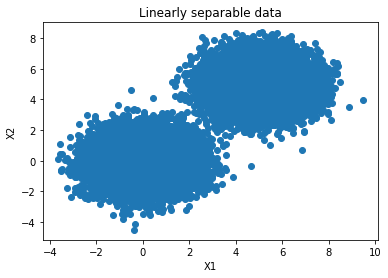

In [70]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [71]:
from sklearn import svm 
from sklearn.metrics import plot_confusion_matrix

In [72]:
clf=svm.SVC(kernel='linear')


In [73]:
clf=clf.fit(X_train,y_train)


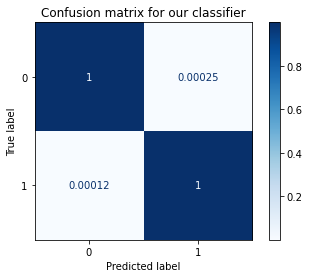

In [74]:
predictions = clf.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [76]:
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions)) 
print(f1_score(y_test,predictions,average=None))

0.9997579571584171
0.9998789639312515
[0.99981533 0.99981846]


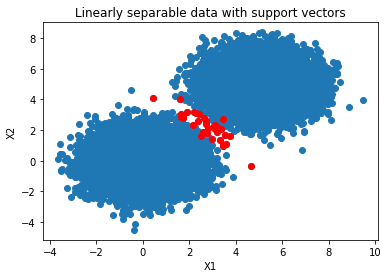

In [77]:
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [80]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [82]:
from mlxtend.plotting import plot_decision_regions


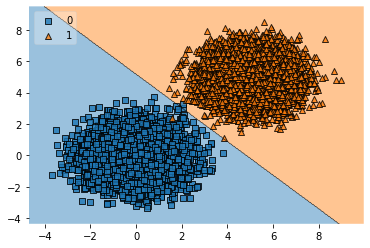

: 

In [83]:
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
plt.show()
